In [53]:
import quandl as qndl
import datetime as dtime
import numpy as nmpy
import pandas as pd   
import csv

qndl.ApiConfig.api_key = "1j7PHpz1kT9sozHM3f6e"
bitcoin_prices_df = qndl.get("BCHAIN/MKPRU", start_date = "2018-11-01", end_date = "2019-04-28", collapse = "daily")
print(bitcoin_prices_df)
prediction = pd.DataFrame(bitcoin_prices_df, columns = ['Value']).to_csv('data.csv')

                  Value
Date                   
2018-11-01  6310.284167
2018-11-02  6342.280833
2018-11-03  6387.674167
2018-11-04  6363.795833
2018-11-05  6391.873333
2018-11-06  6436.965000
2018-11-07  6445.354167
2018-11-08  6538.790000
2018-11-09  6486.251667
2018-11-10  6411.280833
2018-11-11  6399.033333
2018-11-12  6378.268333
2018-11-13  6401.936667
2018-11-14  6372.063333
2018-11-15  6176.155000
2018-11-16  5615.180000
2018-11-17  5596.192500
2018-11-18  5558.243333
2018-11-19  5606.044167
2018-11-20  5303.942500
2018-11-21  4671.970000
2018-11-22  4533.680833
2018-11-23  4548.797500
2018-11-24  4309.337500
2018-11-25  4293.840833
2018-11-26  3823.511667
2018-11-27  3920.536667
2018-11-28  3751.668333
2018-11-29  4103.453846
2018-11-30  4263.783333
...                 ...
2019-03-30  4075.526429
2019-03-31  4107.340833
2019-04-01  4109.316667
2019-04-02  4145.108462
2019-04-03  4675.112500
2019-04-04  5018.498333
2019-04-05  4970.849167
2019-04-06  4980.898333
2019-04-07  5042

In [54]:

from sklearn.model_selection import train_test_split

bitcoin_prices_df = bitcoin_prices_df.reset_index()
bitcoin_out_prices = bitcoin_prices_df['Value'].tolist() 
bitcoin_datetime = bitcoin_prices_df.index.tolist() 
#Defining empty training and testing
train_date,test_date,train_stock_prices, test_stock_prices = ([] for i in range(4))

#Applied cross-validation to obtain more random data for training/testing sets
train_date, test_date, train_bitcoin_prices, test_bitcoin_prices = train_test_split(bitcoin_datetime, bitcoin_out_prices, train_size = 0.75, test_size = 0.25)

#The lists are converted to numpy arrays
train_date = nmpy.array(train_date)
test_date = nmpy.array(test_date)
train_bitcoin_prices = nmpy.array(train_bitcoin_prices)
test_bitcoin_prices = nmpy.array(test_bitcoin_prices)

#Reshaped values as we used single feature
train_date= nmpy.reshape(train_date, (len(train_date), 1))
test_date = nmpy.reshape(test_date, (len(test_date), 1))

print(train_date)
print(test_date)
print(train_bitcoin_prices)
print(test_bitcoin_prices)


[[ 62]
 [ 81]
 [ 51]
 [ 27]
 [ 83]
 [ 63]
 [169]
 [ 70]
 [  0]
 [ 28]
 [ 75]
 [ 11]
 [ 67]
 [133]
 [ 46]
 [ 14]
 [ 87]
 [157]
 [ 33]
 [145]
 [ 92]
 [139]
 [116]
 [174]
 [149]
 [151]
 [  2]
 [ 36]
 [142]
 [ 97]
 [129]
 [158]
 [165]
 [ 49]
 [ 78]
 [127]
 [  3]
 [ 88]
 [108]
 [150]
 [170]
 [172]
 [136]
 [162]
 [  9]
 [ 99]
 [113]
 [ 80]
 [ 66]
 [ 19]
 [ 93]
 [159]
 [ 64]
 [166]
 [ 39]
 [ 15]
 [  5]
 [ 13]
 [154]
 [ 69]
 [ 59]
 [128]
 [152]
 [175]
 [ 23]
 [ 74]
 [ 68]
 [109]
 [ 41]
 [ 71]
 [ 86]
 [  1]
 [ 82]
 [177]
 [176]
 [ 18]
 [156]
 [ 55]
 [ 25]
 [ 16]
 [ 12]
 [144]
 [147]
 [167]
 [  7]
 [125]
 [ 10]
 [ 31]
 [115]
 [ 96]
 [ 54]
 [160]
 [100]
 [121]
 [  6]
 [141]
 [ 95]
 [164]
 [102]
 [163]
 [ 61]
 [ 79]
 [ 76]
 [140]
 [123]
 [ 40]
 [ 20]
 [ 58]
 [122]
 [ 48]
 [153]
 [119]
 [ 35]
 [ 91]
 [146]
 [134]
 [ 21]
 [ 17]
 [105]
 [104]
 [124]
 [ 44]
 [ 50]
 [ 37]
 [ 38]
 [111]
 [130]
 [ 43]
 [  4]
 [148]
 [118]
 [ 53]
 [ 45]
 [168]]
[[171]
 [ 52]
 [ 56]
 [ 98]
 [132]
 [ 72]
 [  8]
 [ 34]
 [ 32

In [55]:
from sklearn import svm
# Created linear Support Vector Regression object
lin = svm.SVR(kernel ='linear',C = 1000)
lin.fit(train_date, train_bitcoin_prices)# Linear Support Vector Regression model is fit to training Data
pred_lin_bitcoin = lin.predict(test_date)# Made predictions using the testing set
print(pred_lin_bitcoin)

[4060.47318713 3867.41482456 3873.90418129 3942.04242691 3997.20195905
 3899.86160818 3796.03190059 3838.21271931 3834.96804094 3825.23400585
 3880.39353801 4002.06897662 4063.7178655  3927.44137428 4006.93599416
 3920.95201754 4005.31365497 3972.86687136 3821.98932749 3955.02114034
 3956.64347953 3929.06371344 3950.15412281 3831.72336257 3901.48394736
 3946.90944444 4034.51576025 4015.04769004 3967.9998538  3851.19143275
 3935.55307017 3961.51049709 3907.9733041  4044.24979533 3830.1010234
 3919.32967836 3859.30312865 3818.74464912 4071.82956142 3875.52652047
 3987.46792398 3995.57961989 3964.75517543 3977.73388887 3888.50523392]


In [56]:
scratch=lin.score(test_date,test_bitcoin_prices)*100 #Checked accuracy of prediction

print(scratch)

0.6228551000937999


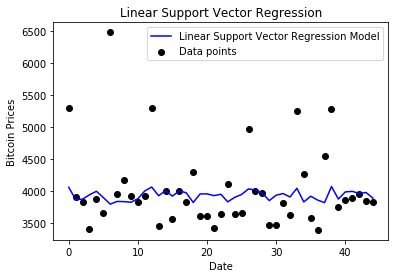

In [57]:
import matplotlib.pyplot as plot

# Plot outputs for Linear Support Vector Regression:
plot.scatter(range(len(test_bitcoin_prices)), test_bitcoin_prices, color = "black", label = "Data points")
plot.plot(range(len(test_bitcoin_prices)), pred_lin_bitcoin, color = "blue", label = "Linear Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Bitcoin Prices")
plot.title("Linear Support Vector Regression")
plot.legend()
plot.show()

In [58]:
from sklearn.svm import SVR

rbf_svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.1) 
rbf_svr.fit(train_date, train_bitcoin_prices)
pred_rbf_bitcoin = rbf_svr.predict(test_date) 

print(pred_rbf_bitcoin)

[5243.85421342 4042.0162249  3697.01628185 3430.43506443 3902.04997402
 3668.05739637 6443.39160601 3938.31744718 4016.29267326 3726.47394498
 3823.53238729 3949.23459342 5350.5876723  3521.20624163 4023.05144722
 3571.97079179 4033.49881935 3954.58665403 4056.85711991 3627.96861822
 3620.78354699 3474.77802858 3643.33769243 4216.20504979 3594.56843848
 3590.54440334 4999.07584183 4006.41762425 3971.89183453 3503.0068985
 3458.56214707 3832.38765538 3639.96483155 5155.36404897 4212.18959583
 3560.10258712 3416.00442207 4387.96689013 5055.20649028 3675.58643793
 3841.6537833  3920.08082537 3957.4805033  3834.64119198 3865.64516613]


In [59]:
print(rbf_svr.score(test_date, test_bitcoin_prices)*100) #Checked accuracy of prediction

98.27487578484967


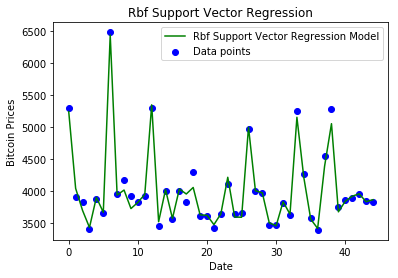

In [60]:
import matplotlib.pyplot as plot

# Plot outputs for Rbf Support Vector Regression:
plot.scatter(range(len(test_bitcoin_prices)), test_bitcoin_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_bitcoin_prices)), pred_rbf_bitcoin, color = "green", label = "Rbf Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Bitcoin Prices")
plot.title("Rbf Support Vector Regression")
plot.legend()
plot.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor

rand_for_reg = RandomForestRegressor(n_estimators = 500, random_state = 42)#Created Random Forest regressor object
rand_for_reg.fit(train_date, train_bitcoin_prices)#Random Forest regressor model is fit to training Data
pred_bitcoin_prices = rand_for_reg.predict(test_date)#Made predictions using the testing set

print(pred_bitcoin_prices)

[5261.19171833 4016.16382167 3903.908185   3447.40012269 3892.91751187
 3856.569745   6492.57329167 3917.616575   4047.48037103 3867.08557462
 3861.75917166 3922.9535726  5340.81580667 3560.55606638 4010.12216405
 3569.87337167 4000.21753478 3963.33435782 4215.8175841  3624.416645
 3632.655005   3480.54426264 3633.379215   4069.64271038 3658.38073833
 3532.88076256 4973.12757542 4001.39116619 3968.92826231 3427.07478167
 3457.70366626 3721.352215   3641.929725   5171.85199667 4013.40972705
 3560.63453    3350.95141166 4510.34385    5336.96425667 3794.180605
 3816.28204666 3917.07338223 3906.98549833 3834.82518897 3867.11564667]


In [62]:
print(rand_for_reg.score(test_date, test_bitcoin_prices)*100)#Checked accuracy of prediction

98.69582374363458


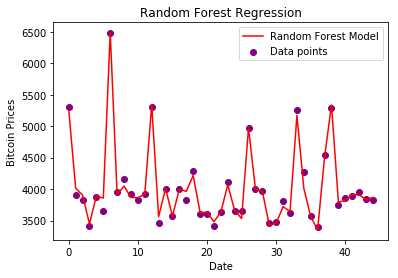

In [63]:
import matplotlib.pyplot as plot

# Plot outputs for Random Forest Regression:
plot.scatter(range(len(test_bitcoin_prices)), test_bitcoin_prices, color = "purple", label = "Data points")
plot.plot(range(len(test_bitcoin_prices)), pred_bitcoin_prices, color = "red", label = "Random Forest Model")
plot.xlabel("Date")
plot.ylabel("Bitcoin Prices")
plot.title("Random Forest Regression")
plot.legend()
plot.show()